# **dataset**

## train_epoch

In [1]:
import torch
import torch.utils.data as data
import torchnet as tnt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import json
import pickle as pkl
import argparse
import pprint

In [2]:
data = np.load('C:/Users/HA/Desktop/e/RS/sattelate/Predictions_id_ytrue_y_pred.npy')
data_num=data.shape[0]

y_true=[]
y_pred=[]

for i in range(0, data_num):
    y_true1 = data[i][1]
    y_pred1 = data[i][2]
    y_true.append(y_true1)
    y_pred.append(y_pred1)

y_true = [int(x) for x in y_true]
y_pred = [int(x) for x in y_pred]
print ("y_true1:", y_true)
print ("y_pred1:", y_pred)

y_true1: [2, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1, 1, 15, 1, 15, 1, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 15, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 15, 1, 1, 15, 15, 15, 1, 15, 15, 15, 1, 1, 1, 15, 1, 1, 15, 15, 1, 15, 15, 15, 15, 1, 15, 1, 15]
y_pred1: [2, 15, 15, 15, 15, 1, 15, 1, 15, 15, 15, 15, 1, 1, 15, 1, 15, 1, 15, 1, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 15, 1, 1, 15, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 15, 1, 1, 15, 15, 15, 1, 15, 15, 15, 1, 1, 1, 15, 1, 1, 15, 15, 1, 15, 15, 15, 15, 1, 15, 1, 1]


In [3]:
num_classes = 19
#y_true=[1,2,3,5,2,4,6,9,8,7,10,12,11,13,15,14,16,15,17,19,18,20,6,9,8,7,10,12,11,13,15,14,16,15,17,19,18,20,3,5,2,4,6,9,8,7,10,12,11,13]
#y_pred=[1,2,3,5,2,4,6,9,8,7,10,12,10,13,15,14,16,15,17,5,18,20,6,9,8,7,12,12,11,13,15,14,16,15,17,8,18,20,3,5,2,4,10,9,8,7,10,12,11,13]
conf_mat  = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))
os.makedirs('C:/Users/HA/Desktop/e/RS/sattelate/matrixx', exist_ok=True)
pkl.dump(conf_mat, open(os.path.join('C:/Users/HA/Desktop/e/RS/sattelate/matrixx', 'conf_mat.pkl'), 'wb'))

cm = np.zeros((num_classes, num_classes))
cm += pkl.load(open('C:/Users/HA/Desktop/e/RS/sattelate/matrixx/conf_mat.pkl', 'rb'))
print("cm.shape: ", cm.shape)




cm.shape:  (19, 19)


In [4]:
mat = cm
TP = 0
FP = 0
FN = 0
per_class = {}
for j in range(mat.shape[0]):
    d = {}
    tp = np.sum(mat[j, j])
    fp = np.sum(mat[:, j]) - tp
    fn = np.sum(mat[j, :]) - tp

    d['IoU'] = tp / (tp + fp + fn)
    d['Precision'] = tp / (tp + fp)
    d['Recall'] = tp / (tp + fn)
    d['F1-score'] = 2 * tp / (2 * tp + fp + fn)

    per_class[str(j)] = d

    TP += tp
    FP += fp
    FN += fn

overall = {}
overall['micro_IoU'] = TP / (TP + FP + FN)
overall['micro_Precision'] = TP / (TP + FP)
overall['micro_Recall'] = TP / (TP + FN)
overall['micro_F1-score'] = 2 * TP / (2 * TP + FP + FN)

macro = pd.DataFrame(per_class).transpose().mean()
overall['MACRO_IoU'] = macro.loc['IoU']
overall['MACRO_Precision'] = macro.loc['Precision']
overall['MACRO_Recall'] = macro.loc['Recall']
overall['MACRO_F1-score'] = macro.loc['F1-score']

overall['Accuracy'] = np.sum(np.diag(mat)) / np.sum(mat)
overall
os.makedirs('C:/Users/HA/Desktop/e/RS/sattelate/resultTest', exist_ok=True)
with open(os.path.join('C:/Users/HA/Desktop/e/RS/sattelate/resultTest', 'overall.json'), 'w') as file:
    file.write(json.dumps(overall, indent=4))

overall

C:\Users\HA\AppData\Local\Temp\ipykernel_12984\3145696763.py:12: RuntimeWarning: invalid value encountered in scalar divide
  d['IoU'] = tp / (tp + fp + fn)
C:\Users\HA\AppData\Local\Temp\ipykernel_12984\3145696763.py:13: RuntimeWarning: invalid value encountered in scalar divide
  d['Precision'] = tp / (tp + fp)
C:\Users\HA\AppData\Local\Temp\ipykernel_12984\3145696763.py:14: RuntimeWarning: invalid value encountered in scalar divide
  d['Recall'] = tp / (tp + fn)
C:\Users\HA\AppData\Local\Temp\ipykernel_12984\3145696763.py:15: RuntimeWarning: invalid value encountered in scalar divide
  d['F1-score'] = 2 * tp / (2 * tp + fp + fn)


{'micro_IoU': 0.8846153846153846,
 'micro_Precision': 0.9387755102040817,
 'micro_Recall': 0.9387755102040817,
 'micro_F1-score': 0.9387755102040817,
 'MACRO_IoU': 0.8553673994850466,
 'MACRO_Precision': 0.9589869281045752,
 'MACRO_Recall': 0.8949181739879414,
 'MACRO_F1-score': 0.9210708814640003,
 'Accuracy': 0.9387755102040817}

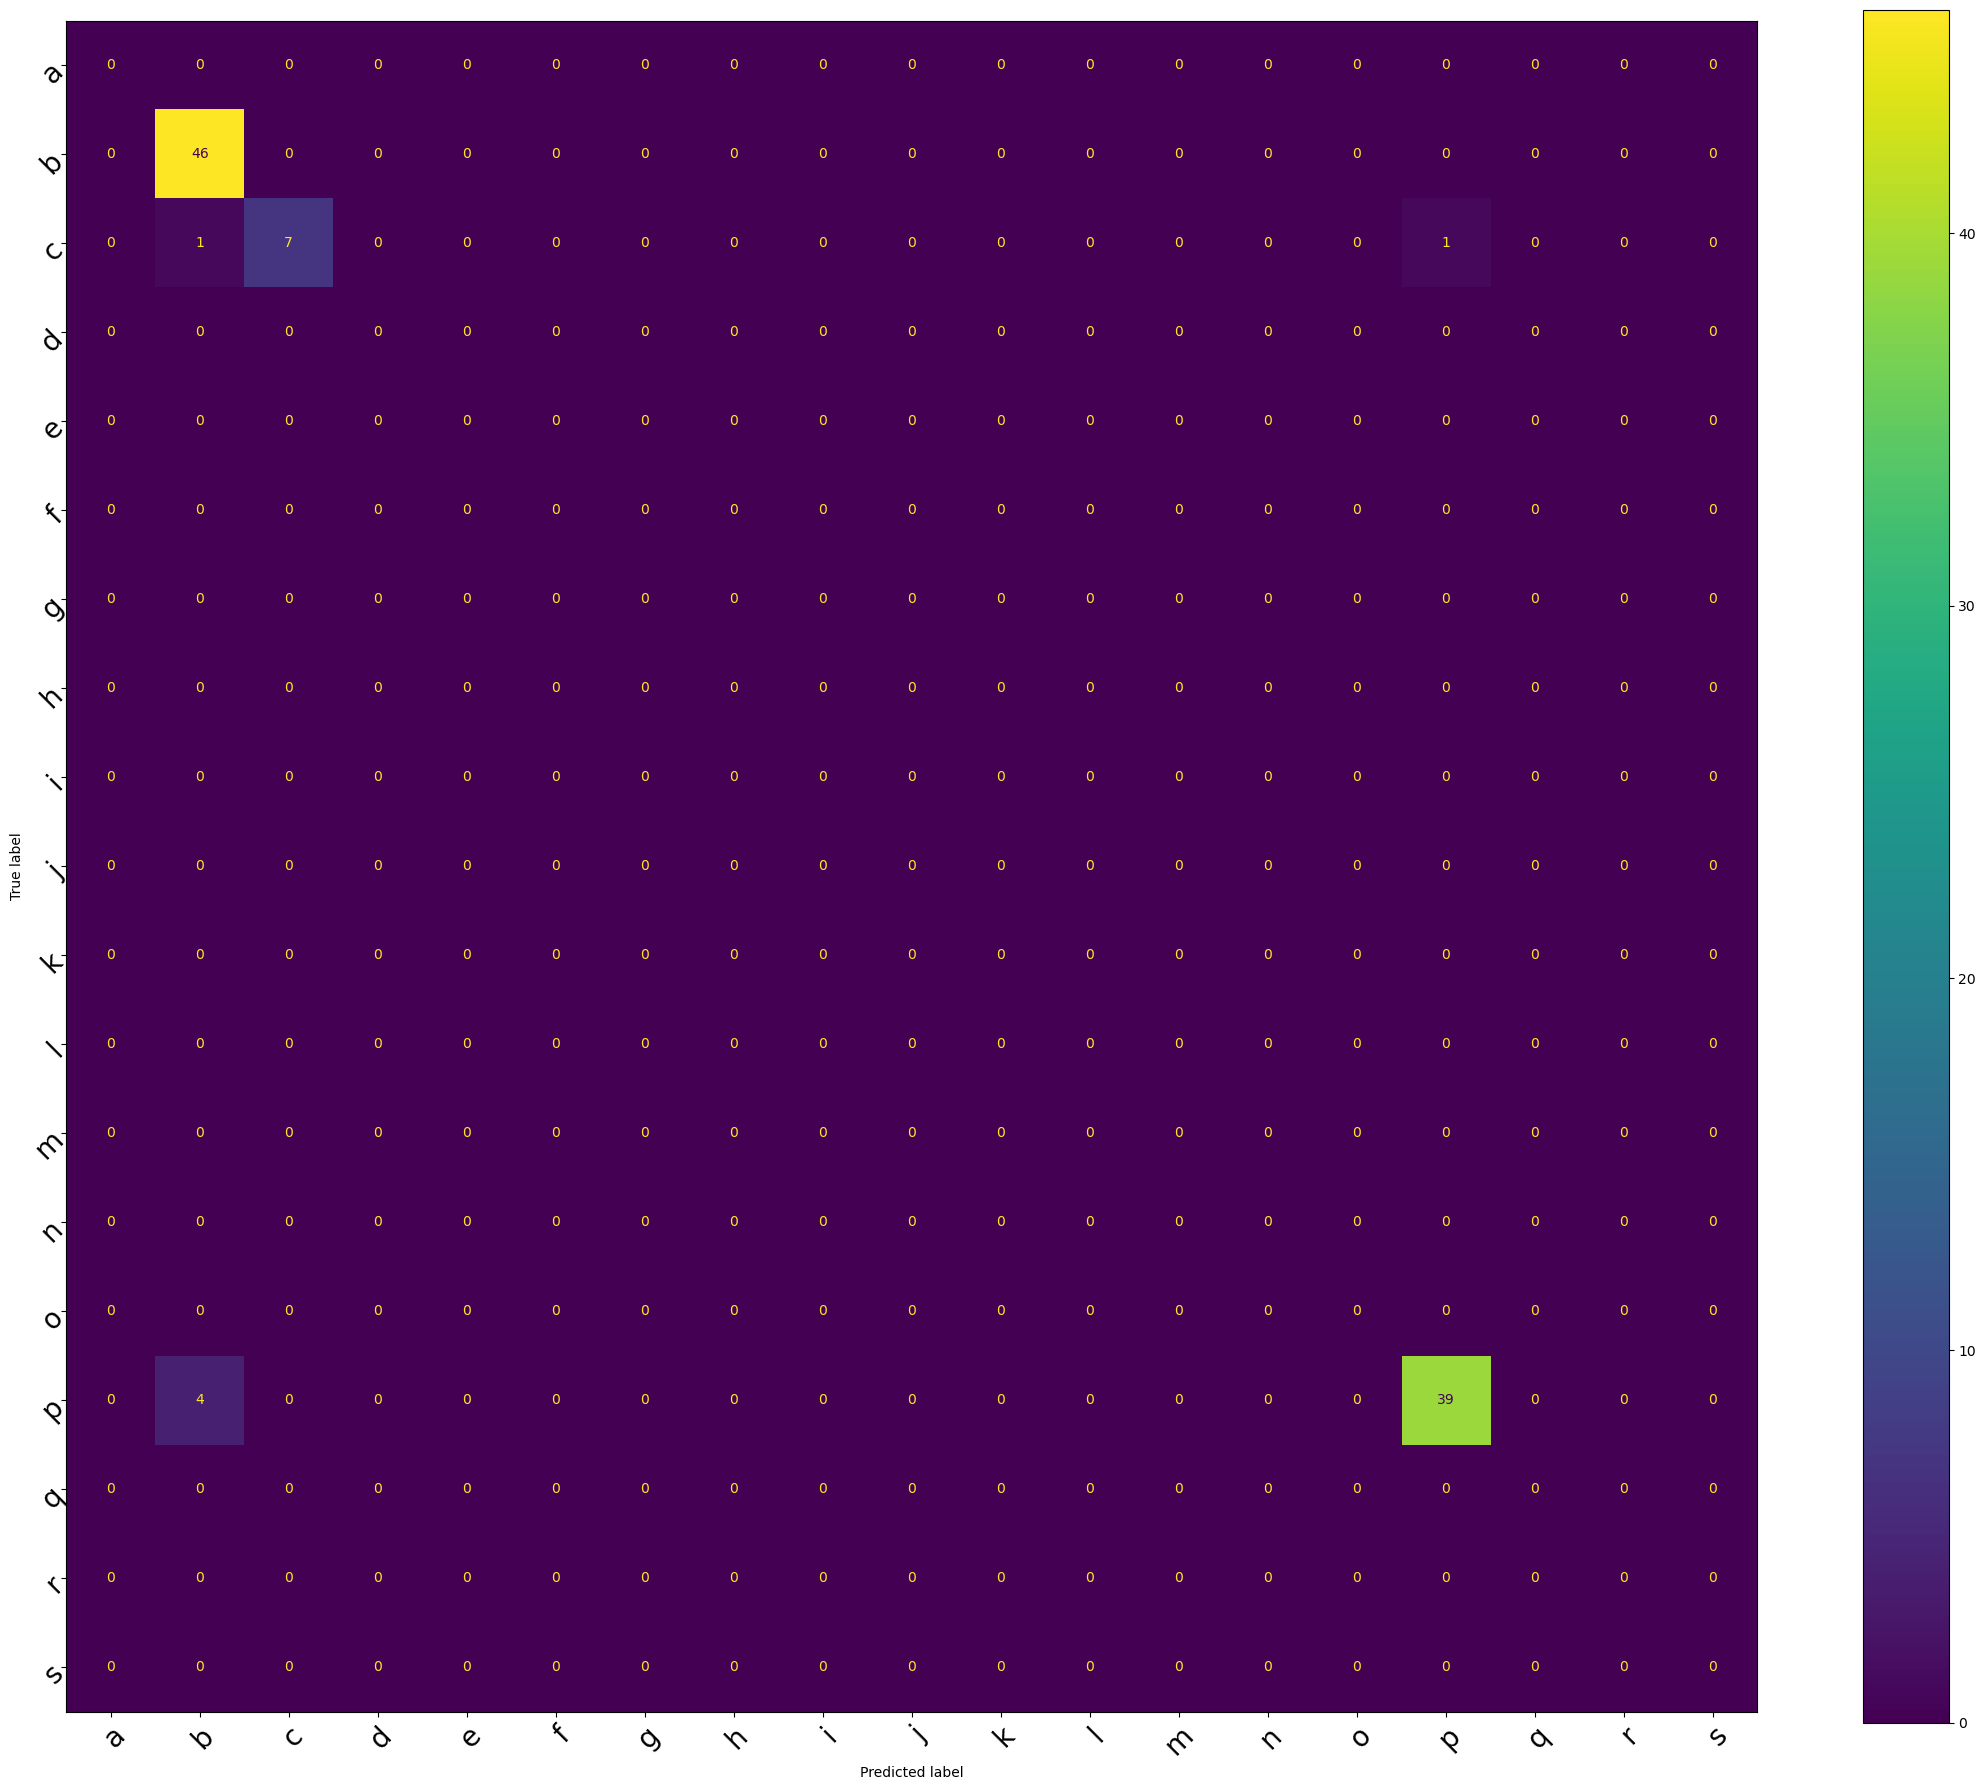

In [18]:
labelss = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s']
#labelss = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels =labelss)
fig, ax = plt.subplots(figsize=(22, 18))  # Set desired width and height
disp.plot(ax=ax)

# Customize additional plot elements as needed (e.g., fontsize, colormap)
ax.tick_params(axis='both', which='major', labelsize=20)  # Adjust tick label fontsize
disp.text_props = {'fontsize': 40}  # Set font size for confusion matrix values

plt.setp(disp.ax_.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(disp.ax_.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()
save_path_cm = os.path.join('C:/Users/HA/Desktop/e/RS/sattelate/resultTest', 'confusion_matrix.png' )
plt.savefig(save_path_cm)
plt.show()




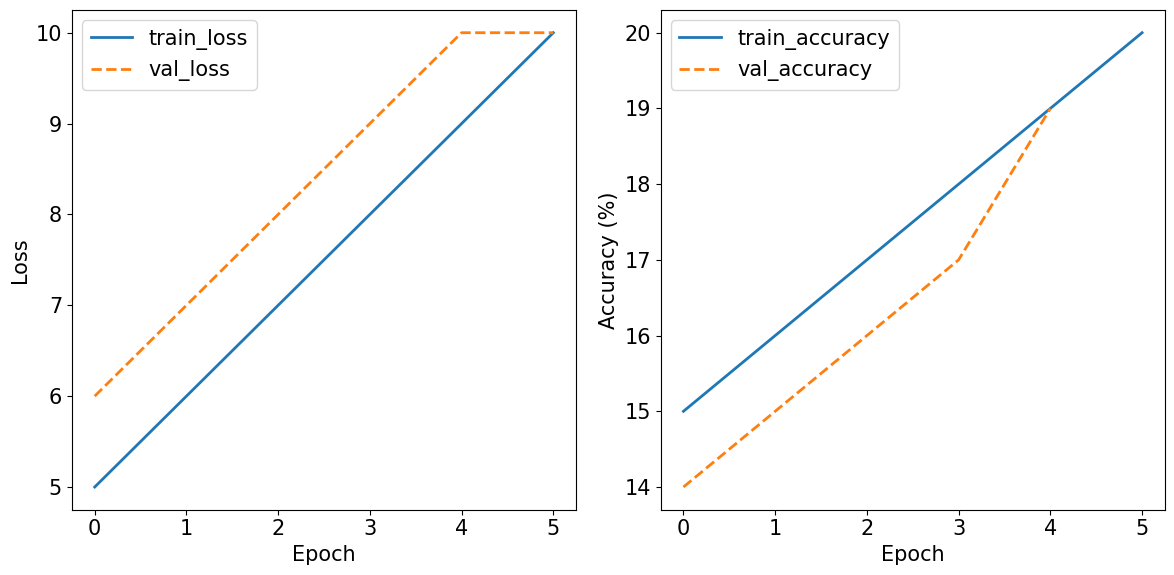

In [ ]:
import matplotlib.pyplot as plt

training_history = {'train_loss': [5,6,7,8,9,10], 'train_accuracy': [15,16,17,18,19,20]}
val_history = {'val_loss': [6,7,8,9,10,10], 'val_accuracy': [14,15,16,17,19]}

# Create two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot loss on the first subplot (ax1)
ax1.plot(training_history["train_loss"], label="train_loss", lw=2, linestyle='-')
ax1.plot(val_history["val_loss"], label="val_loss", lw=2, linestyle='--')
ax1.set_ylabel('Loss', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)

# Plot accuracy on the second subplot (ax2)
ax2.plot(training_history["train_accuracy"], label="train_accuracy", lw=2, linestyle='-')
ax2.plot(val_history["val_accuracy"], label="val_accuracy", lw=2, linestyle='--')
ax2.set_ylabel('Accuracy (%)', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)

# Adjust layout (optional)
plt.tight_layout()

plt.show()
